# Рынок заведений общественного питания Москвы

## Описание проекта:
В планах открыть заведение, в котором посетителей будут обслуживать роботы. Это интересный проект, но дорогой, поэтому нам необходимы инвесторы. Инвесторы, в свою очередь, хотят знать положение дел на рынке. Таким образом необходимо провести исследование рынка и сделать выводы, сформировав это все в отчет.

## Описание данных
Таблица **rest_data:**
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

## Предобработка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('/path.csv')
except:
    data = pd.read_csv('/path/rest_data.csv')

In [3]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
# посчитаем уникальные названия в колонке имя объекта
data['object_name'].value_counts()

Столовая                   267
Кафе                       236
Шаурма                     234
KFC                        155
Шоколадница                142
                          ... 
Столовая ТЦ «Энтузиаст»      1
Охунова У.Д.                 1
СОК ООО АВТОКОМБИНАТ 3       1
АВТОКОМБИНАТ 3               1
Кальянная «Мята Lounge»      1
Name: object_name, Length: 10393, dtype: int64

In [6]:
# приведем к единому регистру 
data['object_name'] = data['object_name'].str.lower()
# проверим как изменилось кол-во уникальных названий
data['object_name'].value_counts()

столовая                      321
кафе                          278
шаурма                        250
шоколадница                   158
kfc                           155
                             ... 
столовая гуп «мосгортранс»      1
пиццерия «алло пицца»           1
bizone антикафе                 1
сирень                          1
кальянная «мята lounge»         1
Name: object_name, Length: 9924, dtype: int64

In [7]:
# мы нашли теоретически единую сеть, с разными названиями
# подумать что с этим делать
test = data[data['object_name'].str.contains(r'\bмята lounge')]
test = test.query('chain == "да"')
test['object_name'].value_counts()

мята lounge                  24
кальянная мята lounge         1
кальян-бар «мята lounge»      1
кальян- бар «мята lounge»     1
мята lounge шаболовка         1
мята lounge автозаводская     1
лаундж-бар «мята lounge»      1
бар мята lounge               1
мята lounge октябрьская       1
кальянная «мята lounge»       1
Name: object_name, dtype: int64

In [8]:
# проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


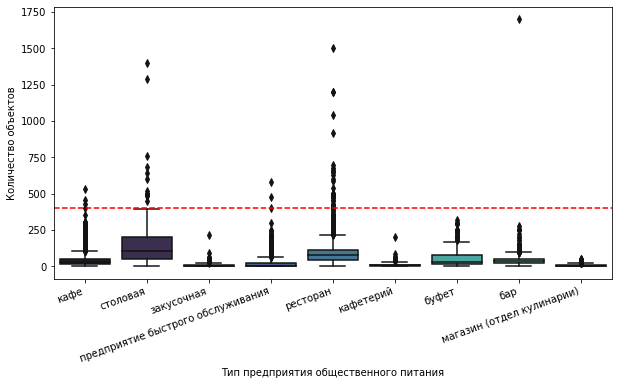

In [9]:
# проверим типы общ. питания на выбросы по кол-ву мест
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=data['object_type'], y=data['number'], palette='mako')
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
#ax.set_axis_label('Тип общественного питания')
#ax.set_xlabel
plt.xlabel('Тип предприятия общественного питания')
plt.ylabel('Количество объектов')
plt.axhline(y=400, color='red', linestyle='--')
plt.show()

In [10]:
# получим список уникальных типов заведений
types = list(data['object_type'].unique())
types

['кафе',
 'столовая',
 'закусочная',
 'предприятие быстрого обслуживания',
 'ресторан',
 'кафетерий',
 'буфет',
 'бар',
 'магазин (отдел кулинарии)']

In [11]:
# посчитаем 99 перцентиль для всех типов общепита
# я бы написала функцию, но я не знаю как написать функцию
# percentiles = pd.DataFrame({'name' : list(data['object_type'].unique()),
#     '99%_percentiele' : [
# np.percentile(data.query('object_type == "кафе"')['number'], [95, 99])[1],
# np.percentile(data.query('object_type == "столовая"')['number'], [95, 99])[1],
# np.percentile(data.query('object_type == "закусочная"')['number'], [95, 99])[1],
# np.percentile(data
#               .query('object_type == "предприятие быстрого обслуживания"')['number'], 
#               [95, 99])[1],
# np.percentile(data.query('object_type == "ресторан"')['number'], [95, 99])[1],
# np.percentile(data
#               .query('object_type == "кафетерий"')['number'], [95, 99])[1],
# np.percentile(data.query('object_type == "буфет"')['number'], [95, 99])[1],
# np.percentile(data.query('object_type == "бар"')['number'], [95, 99])[1],
# np.percentile(data
#               .query('object_type == "магазин (отдел кулинарии)"')['number'],
#               [95, 99])[1]
#          ]})
# percentiles

In [12]:
# Просмотрим 95% и 99% для разных типов общественного питиания,
# для того чтобы в дальнейшем избавиться от аномальных значений
round(data.groupby('object_type')['number'].describe(percentiles=[0.95, 0.99]).T, 2)

object_type,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая
count,856.00,585.00,360.00,6099.00,398.00,273.00,1923.00,2285.00,2587.00
mean,43.49,51.13,7.61,39.72,9.12,5.59,20.55,96.83,130.25
std,67.08,56.33,16.65,37.72,14.64,9.87,38.37,94.76,95.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,35.00,32.00,0.00,30.00,6.00,0.00,5.00,80.00,103.00
95%,102.00,178.00,35.00,100.00,30.00,28.80,92.00,250.00,289.40
99%,189.00,250.00,60.00,190.00,53.33,45.00,168.68,478.48,330.00
max,1700.00,320.00,216.00,533.00,200.00,50.00,580.00,1500.00,1400.00


In [13]:
# после того как мы увидели 99й перцентиль для всех типов ОП, мы можем избавиться от
# 1% чтобы убрать очевидные выбросы
data = data.query('number <= 500')

В датафрейме есть столбец id, в котором каждой строке выдан свой уникальный номер. Если проводить поиск вместе с этим столбцом - мы не найдем дубликатов. Так что проверим на дубликаты без него.

In [15]:
# исключим столбец id из рассмотрения и проверим на дубликаты
data.loc[:, 'object_name' : 'number'].duplicated().sum()

85

В данных обнаружилось 85 дубликатов. Столбец id может автоматически создаваться в реляционных базах данных, даже если вводимая запись уже имеется. Таких данных крайне мало, менее 0.5% на весь датасет, так что, вероятно их можно оставить. 

# Анализ данных

## Соотношение кол-ва объектов ОП к их типу

In [16]:
# проверим на уникальность названия типов точек питания
data['object_type'].value_counts()
#data['oblect_type'].replace('магазин (отдел кулинарии)', 'кулинария')

кафе                                 6098
столовая                             2580
ресторан                             2271
предприятие быстрого обслуживания    1922
бар                                   855
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

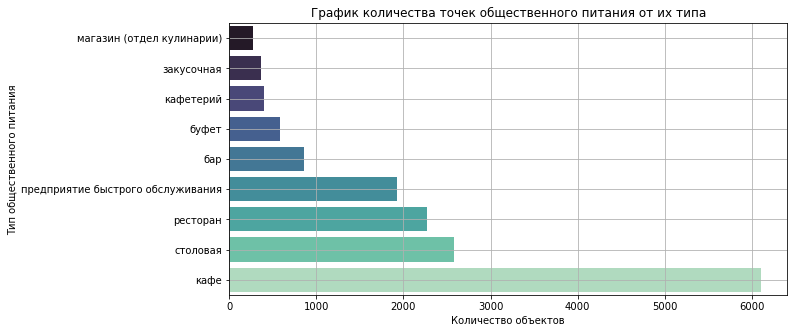

In [17]:
# построим cтолбчатую диаграмму, чтобы посмотреть распределение общего количества
# объектов по типам питания
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x='amount', y='object_type', data=(data
             .groupby('object_type', as_index=False)['id']
             .agg('count')
             .sort_values(by='id')
             .rename(columns={'id' : 'amount'})
), palette='mako',
    )
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Тип общественного питания')
ax.set_title('График количества точек общественного питания от их типа')
# ax.set_yticklabels(['кулинария',
#     'закусочная',
#     'кафетерий',
#     'буфет',
#     'бар',
#     'ПБО',
#     'ресторан',
#     'столовая',
#     'кафе'])
ax.grid(True)
#plt.savefig('amount_on_type.png', dpi=400, bbox_inches='tight')
plt.show()


Исходя из данных, представленных на графике можно сделать вывод - предприятий типа **КАФЕ** гораздо больше чем остальных типов.   

## Соотношение сетевых и несетевых заведений по количеству

In [18]:
# проверим что в столбце chain есть только 2 значения - да и нет
data.groupby('chain', as_index=False)['id'].agg('count')

,chain,id
0,да,2967
1,нет,12375


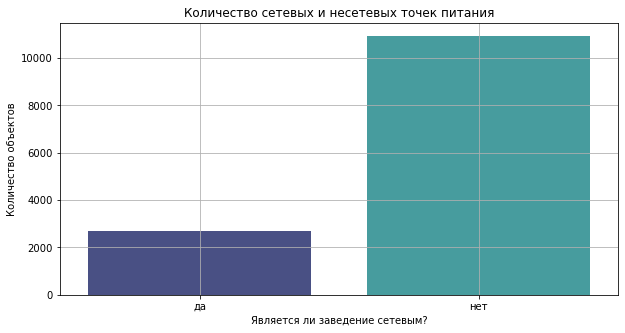

In [19]:
# график, показывающий как разделились сетевые и несетевые заведения
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x='is_chain', y='amount', data=(
    data.query('number > 1')
    .pivot_table(index='chain', values='id', aggfunc='count')
    .reset_index()
    .rename(columns={'chain' : 'is_chain',
                     'id' : 'amount'}
           )
), palette='mako',
    )
ax.set_xlabel('Является ли заведение сетевым?')
ax.set_ylabel('Количество объектов')
ax.set_title('Количество сетевых и несетевых точек питания')
ax.grid(True)
#plt.savefig('chain_or_not.png', dpi=400, bbox_inches='tight')
plt.show()

## Для какого вида объекта общественного питания характерно сетевое распространение?

In [20]:
chain = (data
    .pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
    .reset_index()
     )
chain['ratio_yes'] = (chain['да'] /(chain['да'] + chain['нет'])) * 100.0
chain

chain,object_type,да,нет,ratio_yes
0,бар,37,818,4.327485
1,буфет,11,574,1.880342
2,закусочная,56,304,15.555556
3,кафе,1396,4702,22.892752
4,кафетерий,52,346,13.065327
5,магазин (отдел кулинарии),78,195,28.571429
6,предприятие быстрого обслуживания,790,1132,41.103018
7,ресторан,544,1727,23.954205
8,столовая,3,2577,0.116279


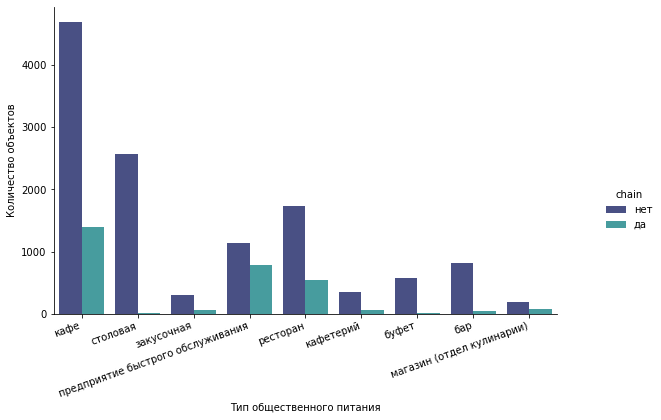

In [21]:
#plt.figure(figsize=(5,10))
ax = sns.catplot(
    x='object_type', kind='count', data=data, hue='chain',
    palette='mako')
ax.fig.set_size_inches(10, 5)
ax.set_xticklabels(rotation=20, ha="right")
ax.set_axis_labels('Тип общественного питания', 'Количество объектов')
plt.savefig('distrib_chain.png', dpi=400, bbox_inches='tight')

plt.show()

Очевидно, что несетевых точек общественного питания гораздо больше.  
При этом для предприятий быстрого обслуживания доля сетевых заведений от суммарного количества заведений, составляет наибольшие 41%. Следом идут рестораны, кафе и отделы кулинарии в магазинах.

## Выбор: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [22]:
# есть заведения с нулевым кол-вом посадочных мест
data['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
229       1
481       1
167       1
259       1
119       1
Name: number, Length: 294, dtype: int64

In [23]:
# посмотрим что представляют из себя заведения с 0 посадочных мест
(data
 .query('number == 0')
 .pivot_table(index='object_type', values='id', aggfunc='count')
)

,id
object_type,
бар,28
буфет,68
закусочная,189
кафе,310
кафетерий,113
магазин (отдел кулинарии),145
предприятие быстрого обслуживания,704
ресторан,45
столовая,19


In [24]:
# таблица среднего кол-ва посадочных мест и кол-ва заведений в сети по имени
avg_type = (data
 .query('chain == "да"')
 .groupby('object_name')
 .agg({'id' : 'count', 'number' : 'mean'})
 .rename(columns={'id' : 'amount', 'number' : 'seats'})
)

In [25]:
# определим 60й перцентиль для того чтобы найти границу между маленьким количеством 
# посадочных мест и большим, то же сделаем для количеством заведений
amount_boarder = np.percentile(avg_type['amount'],[60])[0]
print(f'Граница для кол-ва объектов: {amount_boarder}')
seats_boarder = np.percentile(avg_type['seats'],[60])[0]
print(f'Граница для кол-ва посадочных мест: {seats_boarder}')

Граница для кол-ва объектов: 2.0
Граница для кол-ва посадочных мест: 55.31425219941349


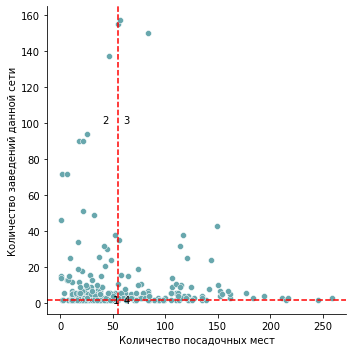

In [26]:
ax = sns.relplot(x='seats', y='amount',
                 data=avg_type.query('amount > 1 & seats > 0'), color='#68A7AD')
plt.axhline(y=2, color='red', linestyle='--')
plt.axvline(55, 0, 1, linestyle='--', color='red')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений данной сети')
plt.text(50, 0, '1', fontsize=10)
plt.text(40, 100, '2', fontsize=10)
plt.text(60, 100, '3', fontsize=10)
plt.text(60, 0, '4', fontsize=10)
plt.savefig('ratio_seat_amount.png', dpi=400, bbox_inches='tight')
plt.show()

Итак, построив график, где по оси х - количество посадочных мест, по оси у - количество заведений некой сети, и разделив его на 4 части мы можем сделать следующие выводы:
 * Зона 1 - область, в которой у сети малое количество заведений и посадочных мест
 * Зона 2 - область, в которой у небольшого количества заведений - большое количество посадочных мест
 * Зона 3 - область, в которой сеть выбирает большое количество заведений и малое количество посадочных мест
 * Зона 4 -  область, в которой у сети большое количество посадочных мест и большое количество заведений
 
 Исходя из графика видно, в зоне 1 сосредоточено большое количество заведений. Вероятно тут находятся кафетерии, и кафе, уже являющиеся сетью, однако, занимающие небольшие помещения.
 Самой распространенной зоной, является область 2 - это те заведения, которые уже выросли в довольно уверенные сети, и имеют большое кол-во точек, однако находятся в помещениях с небольшой площадью.
 Зона 3 - в ней также присутствует довольно большое количество заведений. Вероятно это крупные рестораны, имеющие большое кол-во заведений и занимающие большие площади.
В области большого кол-ва посадочных мест и заведений находится не очень большое количество заведений. Вероятно это столовые, банкетные залы и прочее. 

Выше провела группировку, чтобы посмотреть в каких типах предприятий содержатся заведения с 0 посадочных мест. Для ряда типов предприятий (предприятие быстрого питания, кулинария) это вполне вероятная ситуация - люди приходят и покупают еду навынос. Для остальных типов, это, вероятно, ошибка при заполнении формы или выгрузке данных. 
        Сети с одним заведением, могут быть либо ошибочно занесены в "сетевые", либо это "начинающая" сеть, и остальные заведения еще в процессе строительства (или осталось всего одно заведение и сеть разваливается)
        В рассмотрении вопроса 2.4 мы отфильтруем эти значения и не будем включать их.

## Какой вид предоставляет в среднем самое большое количество посадочных мест? 

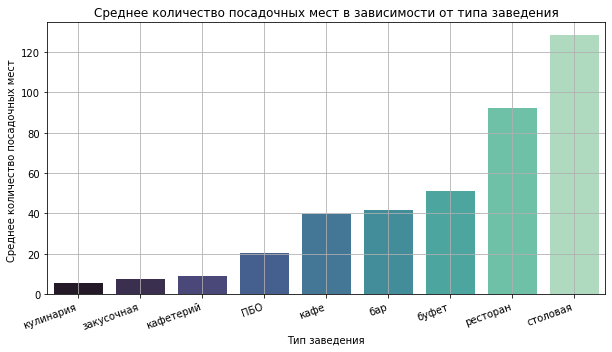

In [27]:
# график распределения среднего кол-ва посадочных мест в зависимости от типа
# предприятия общественного питания
plt.figure(figsize=(10,5))
ax = sns.barplot(x='object_type', y='number', data=data
                                         .groupby('object_type', as_index=False)
                                         .agg({'number' : 'mean'})
                                         .sort_values(by='number')
                                         .round(2), palette='mako'
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
plt.title('Среднее количество посадочных мест в зависимости от типа заведения')
plt.xlabel('Тип заведения')
plt.ylabel('Среднее количество посадочных мест ')
ax.set_xticklabels(['кулинария', 'закусочная', 'кафетерий', 'ПБО', 'кафе', 'бар',
            'буфет', 'ресторан', 'столовая'])
ax.grid(True)
#plt.savefig('avg_seats.png', dpi=400, bbox_inches='tight')
plt.show()

Исходя из графика видно что наибольшее количество посадочных мест ( в среднем) у типа столовая, наименьшее - отдел кулинарии в магазине.

## Извлечение данных об улице

In [28]:
# усовершенствованный вариант выделение улицы из адреса
# там где улицы нет - будет NaN
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat)
# проверим сколько пропусков
data.isna().sum()

id               0
object_name      0
chain            0
object_type      0
address          0
number           0
street         454
dtype: int64

## топ-10 улиц по количеству объектов общественного питания

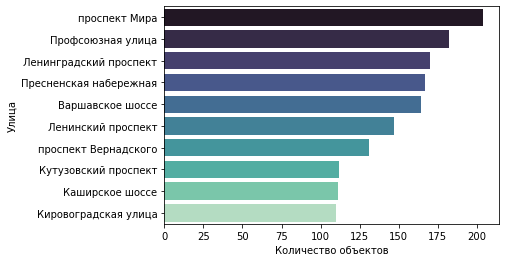

In [29]:
ax = sns.barplot(x='id', y='street', data=(data
                 .groupby('street', as_index=False)['id']
                 .agg('count')
                 .sort_values(by='id', ascending=False)
                 .head(10)
), palette='mako'
)
#ax.set_axis_labels('Количество объектов', 'Улица')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Улица')
plt.savefig('top_ten.png', dpi=400, bbox_inches='tight')
plt.show()

In [30]:
from io import BytesIO
import requests
spreadsheet_id = '1-zBRLJ76x7_K0BcNKeA7zwKWaCn5d_1OnUKJHJiq1tM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content), sep=',')
districts.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [31]:
test_merge = (data
    .groupby('street', as_index=False)['id']
    .agg('count')
    .sort_values(by='id', ascending=False)
    .head(10)
    .reset_index(drop=True)
    .rename(columns={'street' : 'streetname',
                     'id' : 'obj_amount'})
     )
test_merge.head()

,streetname,obj_amount
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,164


In [32]:
top_ten = test_merge.merge(districts, on='streetname', how='inner')
top_ten

,streetname,obj_amount,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Из таблицы видно что наиболее "успешные" улицы, с большим количеством заведений - это большие шоссе, проходящие через некоторое количество различных районов.  

## Число улиц с одним объектом общественного питания

In [33]:
# посмотрим сколько улиц, на которых всего по одному объекту
one_object_data = (data
    .groupby('street', as_index=False)['id']
    .agg('count')
    .sort_values(by='id')
    .reset_index(drop=True)
    .rename(columns={'street' : 'streetname',
                     'id' : 'obj_amount'})
    .query('obj_amount == 1')
                  )
one_object_data.count()

streetname    551
obj_amount    551
dtype: int64

In [34]:
# соберем одну таблицу, в которой улице из нашего списка будут соответствовать округ и
# район
one_ob_distr = one_object_data.merge(districts, on='streetname', how='inner')
one_ob_distr.head()

,streetname,obj_amount,areaid,okrug,area
0,Перовский проезд,1,114,ЮВАО,Район Лефортово
1,Перовский проезд,1,117,ЮВАО,Нижегородский район
2,Измайловская площадь,1,27,ВАО,Район Измайлово
3,переулок Красина,1,17,ЦАО,Пресненский район
4,переулок Васнецова,1,16,ЦАО,Мещанский район


In [35]:
# посмотрим в каком из округов больше всего единичных заведений
one_ob_distr.groupby('okrug')[['streetname','area']].nunique()

,streetname,area
okrug,,
ВАО,59,14
ЗАО,45,10
Зеленоград,5,3
САО,50,14
СВАО,65,15
СЗАО,27,7
ЦАО,175,10
ЮАО,27,8
ЮВАО,52,10


большее количество улиц с ресторанами "одиночками" находятся именно в центре, поскольку именно в центре самые высокие арендные ставки, но и самые высокие потоки людей. Плюс, в связи с старой застройкой данной части города там присутствует большое количество небольших улиц.

## Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

In [36]:
# сформируем лист из 10ти улиц
compare = list(test_merge['streetname'])
# передадим его для фильтрации 
data_test = data.query('street in @compare & number <= 200')

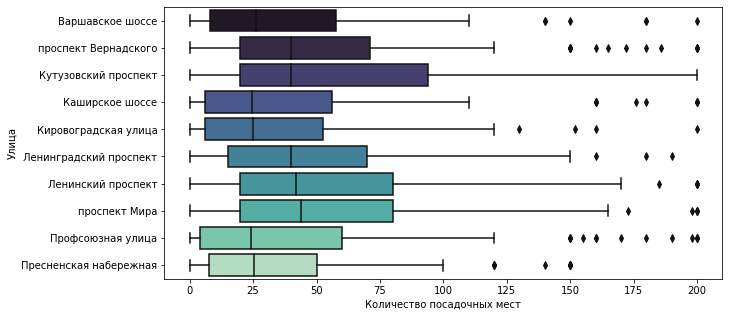

In [37]:
plt.figure(figsize=(10,5))
#ax = sns.stripplot(x='street', y='number', data=data_test, color='black')
ax = sns.boxplot(x='number', y='street', data=data_test, palette='mako')

plt.xlabel('Количество посадочных мест')
plt.ylabel('Улица')
plt.show()

Исходя из графика можно сделать вывод, что медианные значения всех заведений, которые находятся на рассматриваемых десяти наиболее успешных улицах имеют примерно одинаковые значаения - от 25 до 50 посадочных мест.

**ВЫВОДЫ**
* Следует рассмотреть возможность открытия заведения в помещении с небольшой площадью и небольшим количеством посадочных мест (до 50 мест)
* Следует рассмотреть возможность развития заведения в сеть
* Следует размещать заведение вдоль больших автомобильных дорог (шоссе) на которых большой пассажиро-поток 
* Оптимальным выбором места для нового заведения - в пределах 3его транспортного кольца
* Поскольку заведений типа "кафе" в разы больше остальных, может возникнуть конкуренция, таким образом можно остановить выбор на тех типах заведений, число которых не столь велико (закусочная, кафетерий, бар) 

Ссылка на презентацию:
https://drive.google.com/file/d/1V4Say-kfZCgJ3Yj3_Lk-3614gIj2kmTB/view?usp=sharing